In [1]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csvlist = ['total_weekly.csv', 'land_weekly.csv', 'punks_weekly.csv', 'ens_weekly.csv', 'artblocks_weekly.csv']
datalist = []

for i in range(len(csvlist)):
    datalist.append(pd.read_csv(csvlist[i]))


In [4]:
pricelist = []

for i in range(len(csvlist)):
    data = datalist[i]
    pricelist.append(np.log(data['Average USD (7-day)'].values))

In [5]:
timelist = []

for i in range(len(csvlist)):
    data = datalist[i]
    timelist.append([pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']])

In [6]:
observationslist = []

for i in range(len(csvlist)):
    time = timelist[i]
    price = pricelist[i]
    observationslist.append(np.array([time, price]))

In [6]:
MAX_SEARCHES = 100

In [7]:
lppls_model_list = []

for i in range(len(csvlist)):
    observations = observationslist[i]
    lppls_model_list.append(lppls.LPPLS(observations=observations))

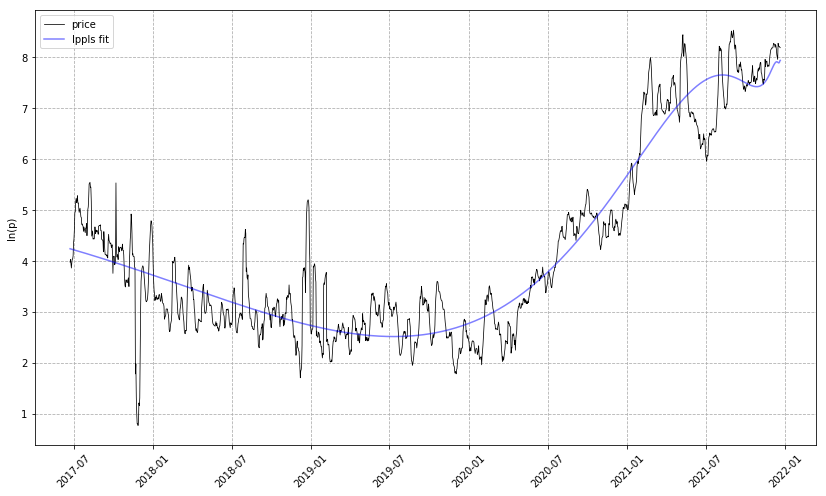

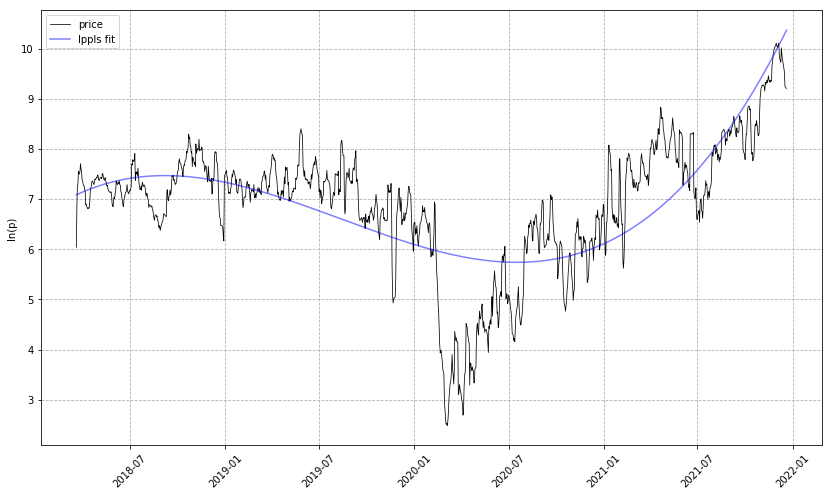

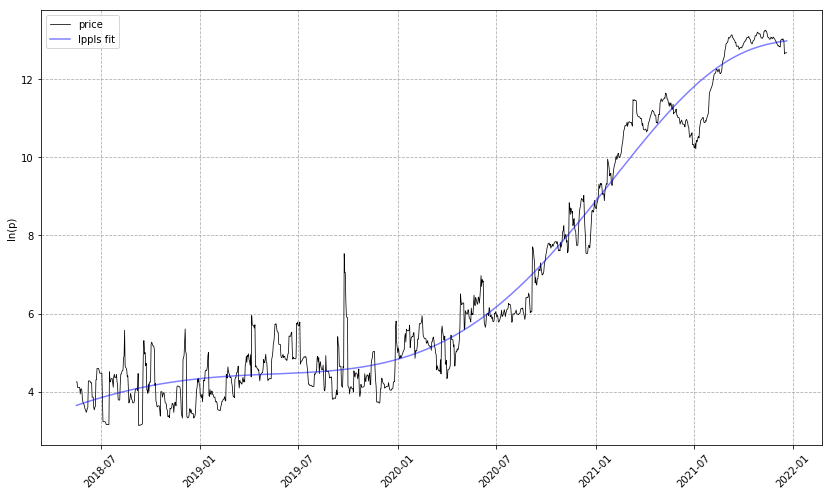

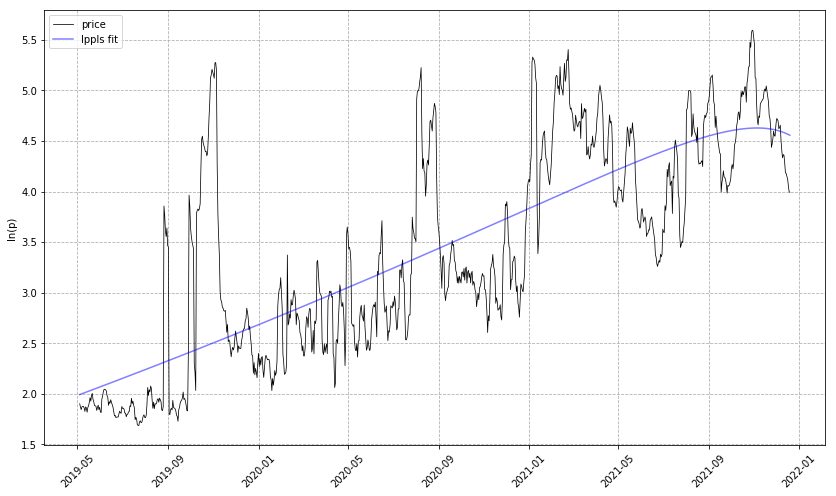

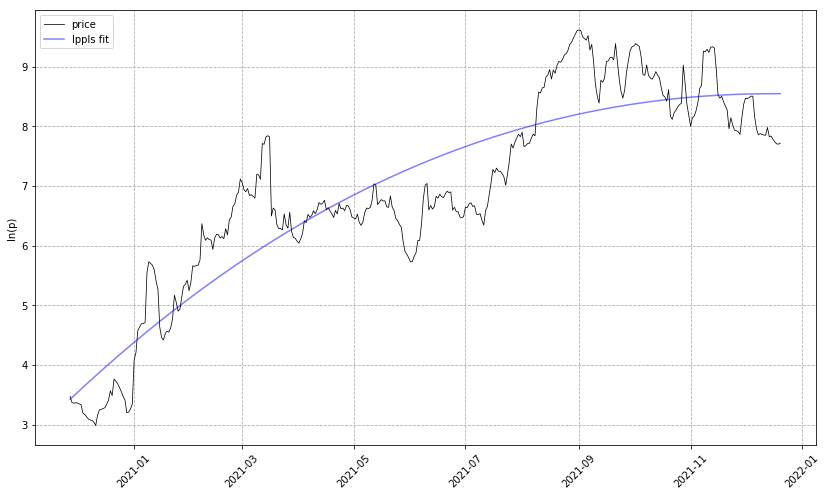

In [8]:
for i in range(len(csvlist)):
    lppls_model = lppls_model_list[i]
    tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)
    lppls_model.plot_fit()

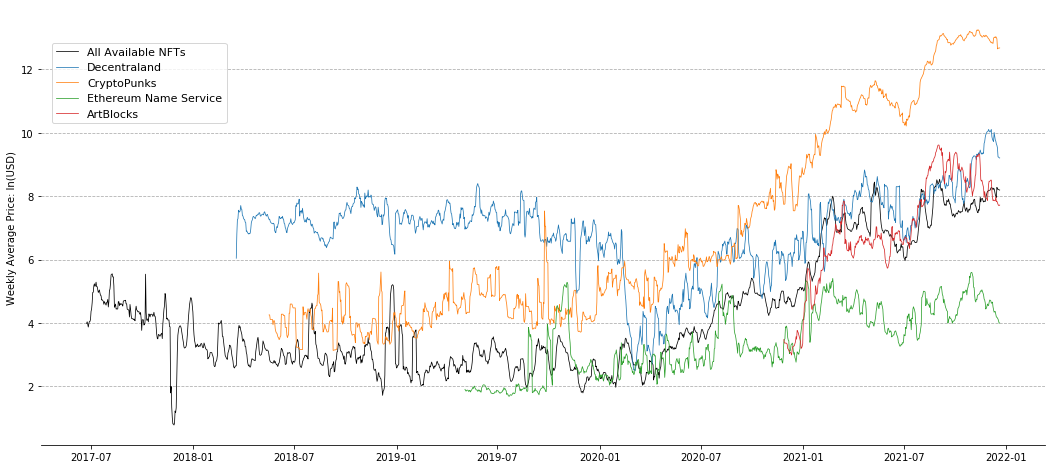

In [8]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(18, 8))
# fig.suptitle(
#     'Single Fit\ntc: {:.2f}, m: {:.2f}, w: {:.2f}, a: {:.2f}, b: {:.2f}, c: {:.2f}, O: {:.2f}, D: {:.2f}'.format(tc, m, w, a, b, c, O, D),
#     fontsize=16)

projectlist = ['All Available NFTs', 'Decentraland', 'CryptoPunks', 'Ethereum Name Service', 'ArtBlocks']
colorlist = ['black', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red']


for i in range(len(csvlist)):   
    price = pricelist[i]
    observations = observationslist[i]
    time = timelist[i]
    
    time_ord = [pd.Timestamp.fromordinal(d) for d in observations[0, :].astype('int32')]
    
    ax1.plot(time_ord, price, label=projectlist[i], color=colorlist[i], linewidth=0.75)
    # ax1.plot(time_ord, lppls_fit, label='lppls fit', color='blue', alpha=0.5)
    
    # if show_tc:
    #     ax1.axvline(x=np.array(tc_ts, dtype=np.datetime64), label='tc={}'.format(ts), color='red', alpha=0.5)

# set grids
ax1.grid(which='major', axis='y', linestyle='--')
# set labels
ax1.set_ylabel('Weekly Average Price: ln(USD)')
#ax1.legend(loc=2)
ax1.legend(bbox_to_anchor=(0, 0.95), loc='upper left', borderaxespad=1, fontsize=11)

top_side = ax1.spines["top"]
top_side.set_visible(False)

right_side = ax1.spines["right"]
right_side.set_visible(False)

left_side = ax1.spines["left"]
left_side.set_visible(False)

plt.xticks(rotation=0)
# ax1.xaxis.set_major_formatter(months)
# # rotates and right aligns the x labels, and moves the bottom of the
# # axes up to make room for them
# fig.autofmt_xdate()

# fig.savefig("figuretotal.png", dpi=300, bbox_inches='tight')

In [10]:
# compute confidence indicators

reslist = []

for i in range(len(csvlist)):
    lppls_model = lppls_model_list[i]
    reslist.append(lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=120, 
    smallest_window_size=30, 
    outer_increment=1, 
    inner_increment=5, 
    max_searches=25,
    # filter_conditions_config={} # not implemented in 0.6.x
    ))

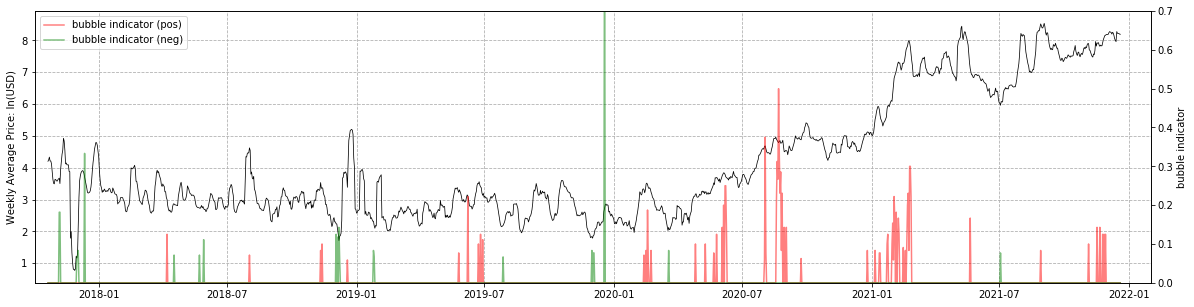

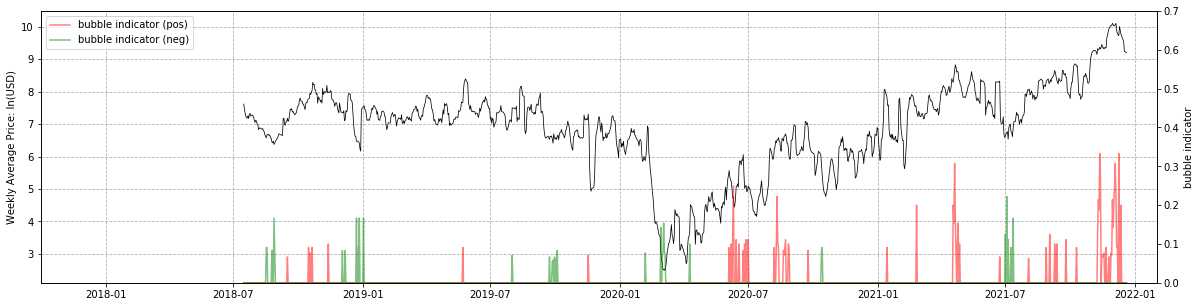

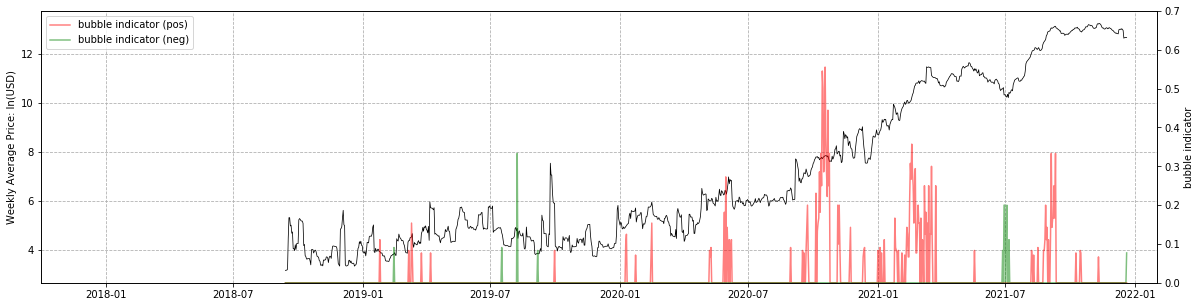

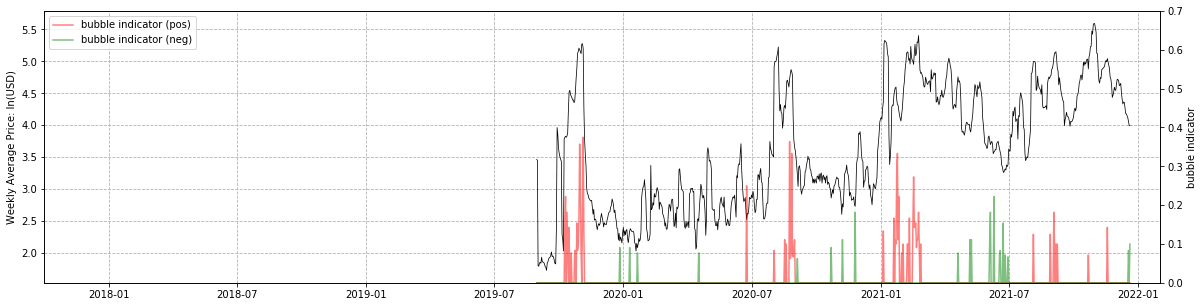

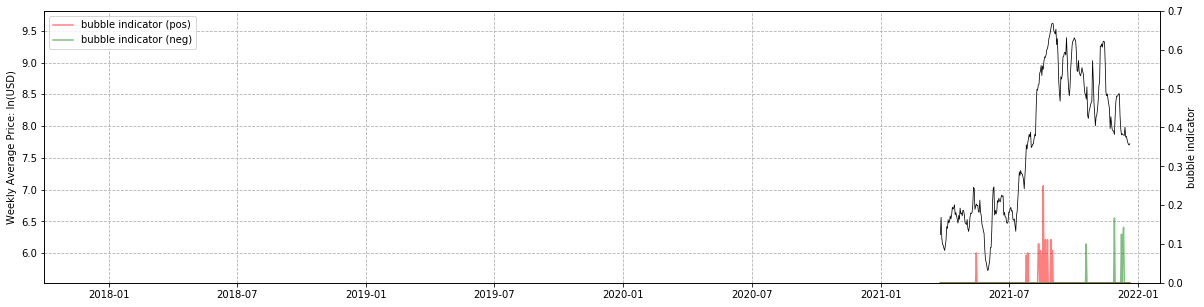

In [26]:
# plot in the same figure, with the same time-span 

res_df_list = []

for i in range(len(csvlist)):
    res = reslist[i]
    res_df_list.append(lppls_model.compute_indicators(res))


sxmin='2017-10-01'
sxmax='2022-02-01'
xmin = dt.strptime(sxmin, '%Y-%m-%d')
xmax = dt.strptime(sxmax, '%Y-%m-%d')
    
    
for i in range(len(csvlist)):
    res_df = res_df_list[i]

    fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(20, 5))

    ord = res_df['time'].astype('int32')
    ts = [pd.Timestamp.fromordinal(d) for d in ord]

    ax1_0 = ax1.twinx()
    ax1.plot(ts, res_df['price'], color='black', linewidth=0.75)
    ax1_0.plot(ts, res_df['pos_conf'], label='bubble indicator (pos)', color='red', alpha=0.5)
    ax1_0.plot(ts, res_df['neg_conf'], label='bubble indicator (neg)', color='green', alpha=0.5)
    
    #axes = plt.axes()
    #axes.set_xlim([2018, 2022])
    
    plt.xlim([xmin,xmax])
    plt.ylim([0.0,0.7])
    
    # set grids
    ax1.grid(which='major', axis='both', linestyle='--')

    # set labels
    ax1.set_ylabel('Weekly Average Price: ln(USD)')

    ax1_0.set_ylabel('bubble indicator')

    ax1_0.legend(loc=2)

    plt.xticks(rotation=0)
    
    #fig.savefig("figureC" + str(i) + ".png", dpi=300, bbox_inches='tight')